In [1]:
import tensorflow as tf
from keras.src.legacy.preprocessing.image import ImageDataGenerator
import os

In [2]:
data_dir = 'data/kumas_tipi/'

In [5]:
batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalizasyon
    validation_split=0.2,       # Eğitim ve doğrulama setlerine ayrım
    rotation_range=40,          # Resimleri döndürme
    width_shift_range=0.2,      # Genişlik kaydırma
    height_shift_range=0.2,     # Yükseklik kaydırma
    shear_range=0.2,            # Kesme kaydırması
    zoom_range=0.2,             # Yakınlaştırma
    horizontal_flip=True,       # Yatay çevirme
    fill_mode='nearest'         # Doldurma modu
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 960 images belonging to 10 classes.
Found 240 images belonging to 10 classes.


In [6]:
from keras.src import Sequential
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout ,InputLayer

model = Sequential([
    InputLayer(input_shape=(img_height, img_width, 3)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
epochs = 30

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/30


c:\Users\PC\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.1499 - loss: 2.4379 - val_accuracy: 0.2042 - val_loss: 2.2646
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.2573 - loss: 2.0663 - val_accuracy: 0.2667 - val_loss: 2.1154
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.3155 - loss: 1.9384 - val_accuracy: 0.3375 - val_loss: 1.9421
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.3822 - loss: 1.7886 - val_accuracy: 0.3125 - val_loss: 1.9125
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.4128 - loss: 1.6821 - val_accuracy: 0.3875 - val_loss: 1.7364
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.4236 - loss: 1.6610 - val_accuracy: 0.3833 - val_loss: 1.9324
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.4536 - loss: 1.6574 - val_accuracy: 0.4167 - val_loss: 1.8489
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.4862 - loss: 1.4961 - val_accuracy: 0.3917 - val_loss: 1.8172
Epo

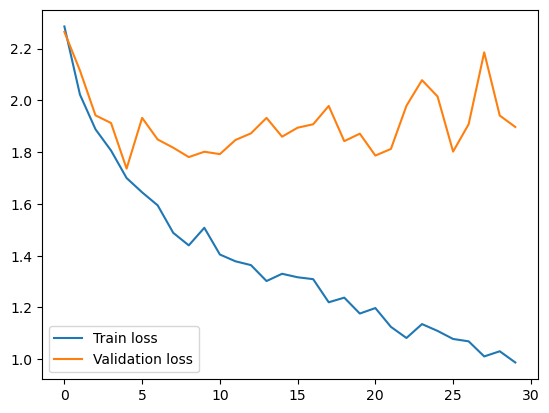

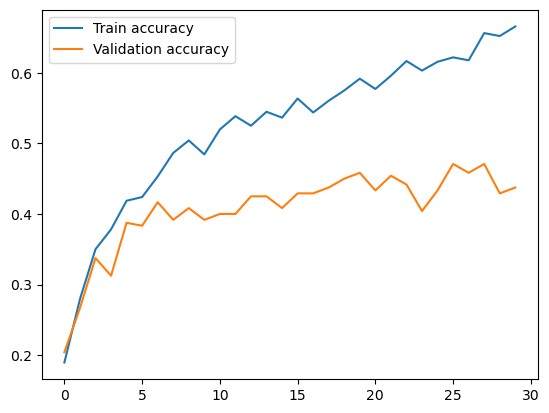

In [9]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıp grafiğini çiz
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluk grafiğini çiz
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.legend()
plt.show()

In [11]:
# Modeli kaydet
model.save('kumas_tipi_model.h5')


In [1]:
from keras.api.models import load_model

# Modeli yükle
loaded_model = load_model('kumas_tipi_model.h5')


In [3]:
import numpy as np
from keras.src.legacy.preprocessing import image

# Test için bir görüntü yükle
img_path = 'C:\\Users\\PC\OneDrive\\Resimler\\Ekran Görüntüleri\\Ekran görüntüsü 2024-06-30 165146.png'
img = image.image_utils.load_img(img_path, target_size=(img_height, img_width))
img_array = image.image_utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Resmi 4 boyutlu hale getirir (1, img_height, img_width, 3)
img_array /= 255.0  # Normalizasyon

# Modeli kullanarak tahmin yap
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Tahmin edilen sınıfı yazdır
class_labels = list(train_generator.class_indices.keys())
print("Tahmin edilen sınıf:", class_labels[predicted_class[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


NameError: name 'train_generator' is not defined